## Observations and Insights 

### Observations
From the bar charts, it's clear that Capomulin and Ramicane has the highest number of measurements taken during the trial. The pie charts shows that male count is higher than female count, this data doesn't make any impact on the overall drug regimen results. It's clear from the line chart, that Capomulin treatment was working because the tumor volume decreased as the treatment continued. There's a positive correlation between average tumor volume and weight but there isn't enough data to  establish causation. 


In [198]:

%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Combine the data into a single dataset.  
mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [199]:
# Checking the number of mice.
a = len(mouse_study_data["Mouse ID"].value_counts())
a

249

In [200]:
dupl = mouse_study_data.duplicated(subset =["Mouse ID", "Timepoint"])
mouse_study_data[dupl]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [201]:

mouse_study = mouse_study_data.loc[mouse_study_data["Mouse ID"] !='g989',:]
l = len(h["Mouse ID"].value_counts())
l


248

In [202]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_study = mouse_study_data.drop_duplicates(subset= ["Mouse ID", "Timepoint"])

# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [203]:
# Checking the number of mice in the clean DataFrame.
b = len(mouse_study["Mouse ID"].value_counts())
b

248

In [204]:
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [205]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

sum_stat_gr = mouse_study.groupby(["Drug Regimen"])

mean = sum_stat_gr["Tumor Volume (mm3)"].mean()
mean
median = sum_stat_gr["Tumor Volume (mm3)"].median()
median
variance = sum_stat_gr["Tumor Volume (mm3)"].var()
variance
std_dev = sum_stat_gr["Tumor Volume (mm3)"].std()
std_dev
sem = sum_stat_gr["Tumor Volume (mm3)"].sem()
sem


summary_stat = pd.DataFrame({"Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation":std_dev,
                            "SEM":sem})
summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [206]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [207]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#meas = mouse_study.groupby(["Drug Regimen"])['Mouse ID'].count()

meas = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]

meas

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

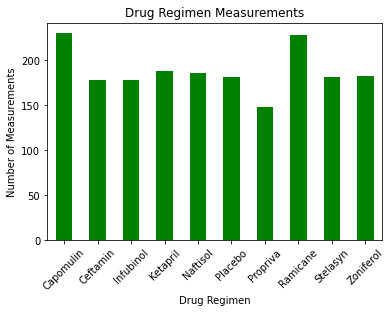

<Figure size 432x288 with 0 Axes>

In [208]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
meas.plot(kind = "bar", facecolor = "green", title = "Drug Regimen Measurements", rot = "45") 
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

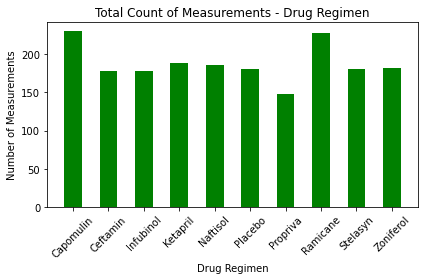

In [226]:
plt.bar(meas.index.values,meas.values,color ="g", align = "center", width = .5)
plt.xticks(rotation="45")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.title("Total Count of Measurements - Drug Regimen")
plt.tight_layout()
plt.show

x_axis = np.arange(len(meas))
tick_locations = [value for value in x_axis]
print(x_axis)
print(tick_locations)
plt.figure(figsize=(20,3))
plt.bar(x_axis, meas, color='r', alpha=0.5, align="center")
plt.xticks( rotation="vertical")
plt.tight_layout()
plt.show()

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#gender = mouse_study["Sex"].value_counts()
#gender
#df = pd.DataFrame(gender)


In [211]:
#df

In [212]:
#df.plot.pie(y = "Sex")

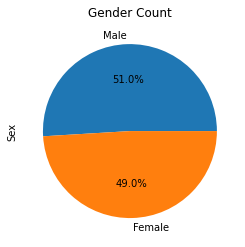

In [213]:
gender.plot(kind="pie",title="Male vs Female Count",autopct="%1.1f%%")
plt.title("Gender Count")
plt.show()


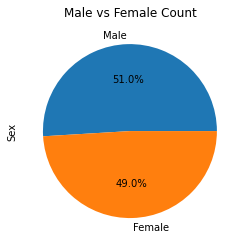

In [214]:
# Create Labels for the sections of the pie
labels = ["Male","Female"]

#List the values of each section of the pie chart
sizes = [958,922]
plt.pie(df["Sex"],labels = labels, autopct="%1.1f%%")
plt.title('Male vs Female Count')
plt.ylabel('Sex')
plt.show()

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [216]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_loc = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
ram_loc = mouse_study.loc[mouse_study["Drug Regimen"] == "Ramicane"]
inf_loc = mouse_study.loc[mouse_study["Drug Regimen"] == "Infubinol"]
cef_loc =  mouse_study.loc[mouse_study["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
cap_max = cap_loc.groupby("Mouse ID")["Timepoint"].max()
cap_max
ram_max = ram_loc.groupby("Mouse ID")["Timepoint"].max()
inf_max = inf_loc.groupby("Mouse ID")["Timepoint"].max()
cef_max = cef_loc.groupby("Mouse ID")["Timepoint"].max()
#Dataframe
#cap_df = pd.DataFrame(cap_max)
#ram_df = pd.DataFrame(ram_max)
#inf_df = pd.DataFrame(inf_max)
#cef_df = pd.DataFrame(cef_max)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_max,mouse_study, on = ("Mouse ID", "Timepoint"), how = "left")
ram_merge = pd.merge(ram_max,mouse_study, on = ("Mouse ID", "Timepoint"), how = "left")
inf_merge = pd.merge(inf_max,mouse_study, on = ("Mouse ID", "Timepoint"), how = "left")
cef_merge = pd.merge(cef_max,mouse_study, on = ("Mouse ID", "Timepoint"), how = "left")
#cap_merge
#cap_max

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [217]:
cap_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [218]:
cap_merge.count()

Mouse ID              25
Timepoint             25
Drug Regimen          25
Sex                   25
Age_months            25
Weight (g)            25
Tumor Volume (mm3)    25
Metastatic Sites      25
dtype: int64

In [227]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = [cap_merge,ram_merge,inf_merge,cef_merge]

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []
regimen_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
a = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for x in regimen_list:
    regimen = x.loc[:,"Tumor Volume (mm3)"]
    vol_data.append(regimen)
    
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower = lowerq - (1.5*iqr)
    upper = upperq + (1.5*iqr)
    print(regimen_names[a])
    a+=1
    print(f"Values below {lower} could be outliers and above {upper} could be outliers.")
    print("===============")
#vol_data    

Capomulin
Values below 20.70456164999999 could be outliers and above 51.83201549 could be outliers.
Ramicane
Values below 17.912664470000003 could be outliers and above 54.30681135 could be outliers.
Infubinol
Values below 36.83290494999999 could be outliers and above 82.74144559000001 could be outliers.
Ceftamin
Values below 25.355449580000002 could be outliers and above 87.66645829999999 could be outliers.


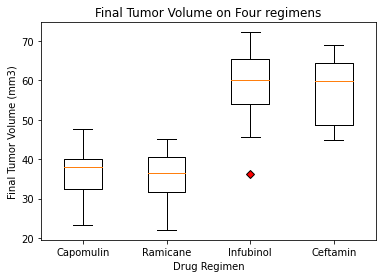

In [220]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots()

ax1.set_title('Final Tumor Volume on Four regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(vol_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=red_diamond)

plt.show()

## Line and Scatter Plots

In [221]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#cap = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
#cap
s185 = cap_loc.loc[cap_loc["Mouse ID"] == "s185"]
s185
s185_df = pd.DataFrame(s185)
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<function matplotlib.pyplot.show(*args, **kw)>

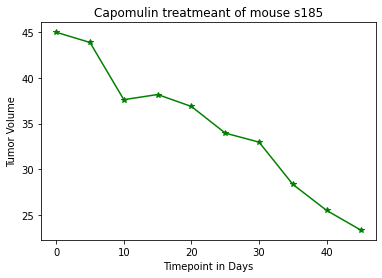

In [222]:
plt.plot(s185_df["Timepoint"],s185_df["Tumor Volume (mm3)"], marker = "*",color = "green")
plt.title('Capomulin treatmeant of mouse s185')
plt.xlabel('Timepoint in Days')
plt.ylabel('Tumor Volume')
plt.show

In [223]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_vol = cap_merge.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tum_vol
#avg_wgt = cap_merge.groupby(["Mouse ID"])["Weight (g)"].mean()
wgt = cap_merge["Weight (g)"]
wgt
#avg_tum_vol

0     22
1     21
2     17
3     19
4     22
5     24
6     20
7     23
8     21
9     21
10    19
11    17
12    19
13    25
14    17
15    25
16    17
17    23
18    17
19    17
20    21
21    23
22    21
23    15
24    17
Name: Weight (g), dtype: int64

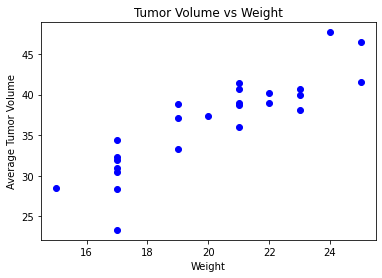

In [224]:
plt.scatter(wgt,avg_tum_vol, marker="o", color="blue")
plt.title("Tumor Volume vs Weight")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.show()



## Correlation and Regression

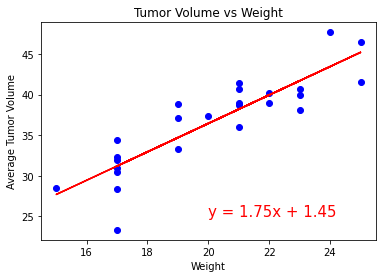

In [225]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = wgt
y_values = avg_tum_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Tumor Volume vs Weight")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.show()